In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load balanced dataset

In [7]:
df=pd.read_csv('cleaned_balanced.csv')
df

,Unnamed: 0,Review,Rating
0,0,I'm worried about the quality of the shirt. it...,2.0
1,1,One wash wonder...i'm a s to m and went with a...,3.0
2,2,nice but kinda too long n shrinks easily,4.0
3,3,"It took a long time to get, but it was worth i...",3.0
4,4,"Wife’s review:Material is very soft, love the ...",3.0
...,...,...,...
9995,9995,Runs small. Otherwise nice shorts,3.0
9996,9996,"I ordered a 3 pack of large, black, brown & gr...",3.0
9997,9997,"I am normally a m-l (170 lbs, 5'4"", 34dd). i o...",3.0
9998,9998,A little to thin,4.0


In [8]:
df=df.drop(columns='Unnamed: 0')

In [9]:
df

,Review,Rating
0,I'm worried about the quality of the shirt. it...,2.0
1,One wash wonder...i'm a s to m and went with a...,3.0
2,nice but kinda too long n shrinks easily,4.0
3,"It took a long time to get, but it was worth i...",3.0
4,"Wife’s review:Material is very soft, love the ...",3.0
...,...,...
9995,Runs small. Otherwise nice shorts,3.0
9996,"I ordered a 3 pack of large, black, brown & gr...",3.0
9997,"I am normally a m-l (170 lbs, 5'4"", 34dd). i o...",3.0
9998,A little to thin,4.0


In [10]:
df['Rating'].value_counts()

Rating
2.0    2000
3.0    2000
4.0    2000
5.0    2000
1.0    2000
Name: count, dtype: int64

## visualization of balanced dataset

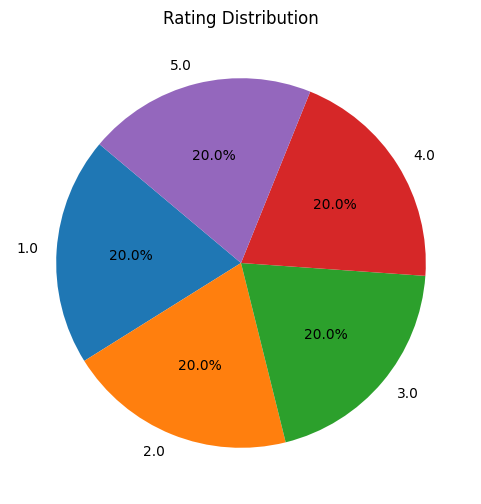

In [11]:
rating_counts = df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\3926856831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


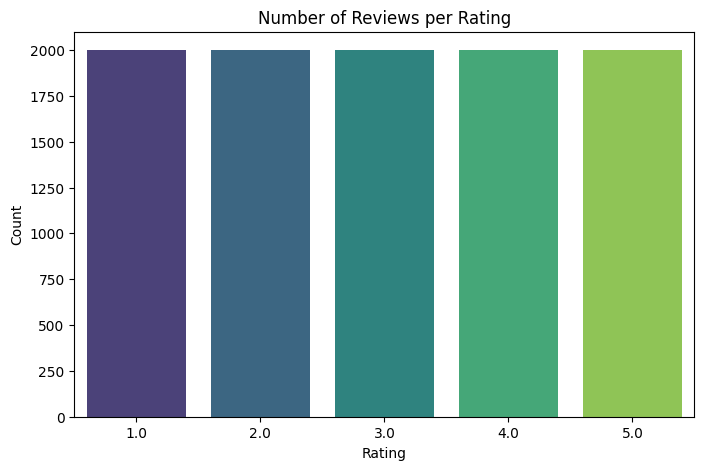

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\2378602375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Word_Count', data=df, palette='Set2')


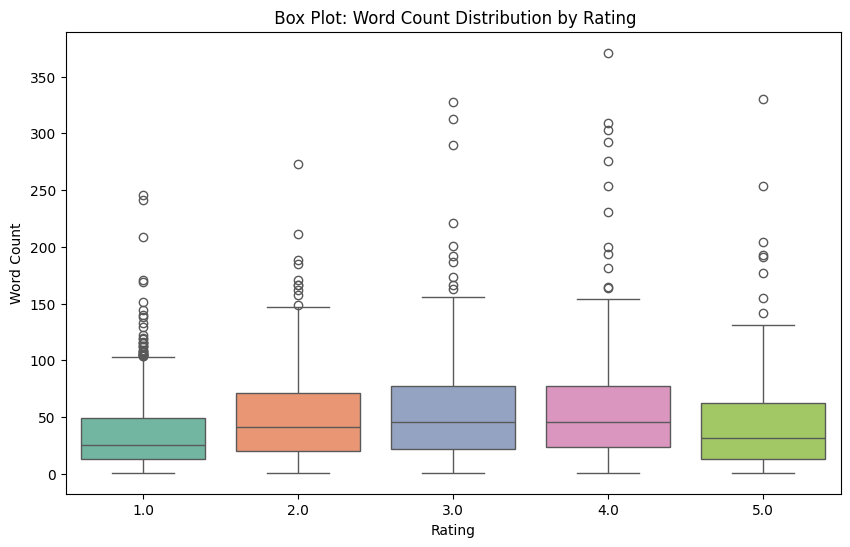

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\2378602375.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Rating')


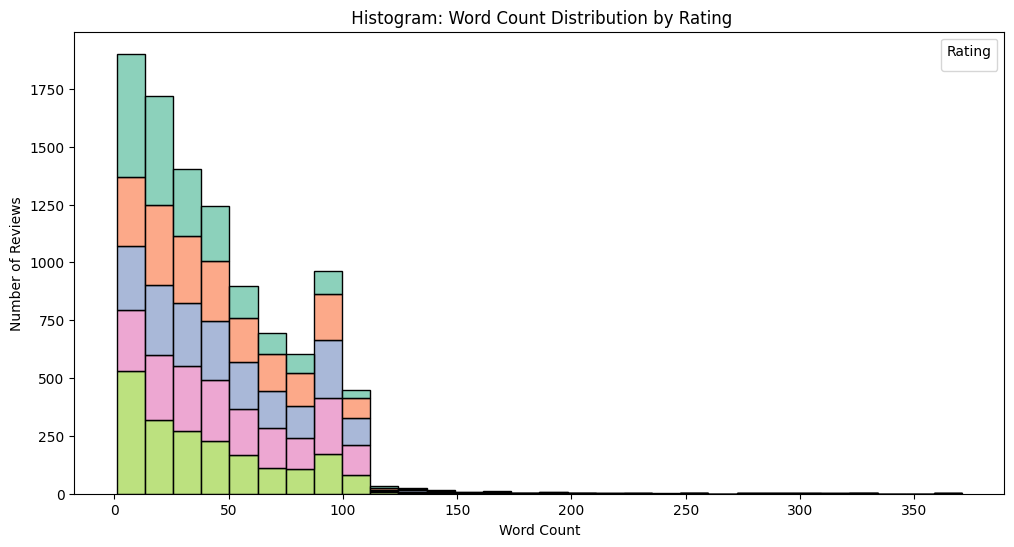

In [13]:
# STEP 1: Add a word count column
df['Word_Count'] = df['Review'].astype(str).apply(lambda x: len(x.split()))

# STEP 2: Box Plot — Word Count Distribution by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Word_Count', data=df, palette='Set2')
plt.title(" Box Plot: Word Count Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.show()

# STEP 3: Histogram — Word Count by Rating
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Word_Count', hue='Rating', multiple='stack', palette='Set2', bins=30)
plt.title(" Histogram: Word Count Distribution by Rating")
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.legend(title='Rating')
plt.show()

In [14]:
word_count_by_rating = df.groupby('Rating')['Word_Count'].sum()

# Step 3: Display the result
print(" Total Word Count per Rating:\n")
print(word_count_by_rating)

 Total Word Count per Rating:

Rating
1.0     69203
2.0     94098
3.0    101840
4.0    103179
5.0     81101
Name: Word_Count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\1579722604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')


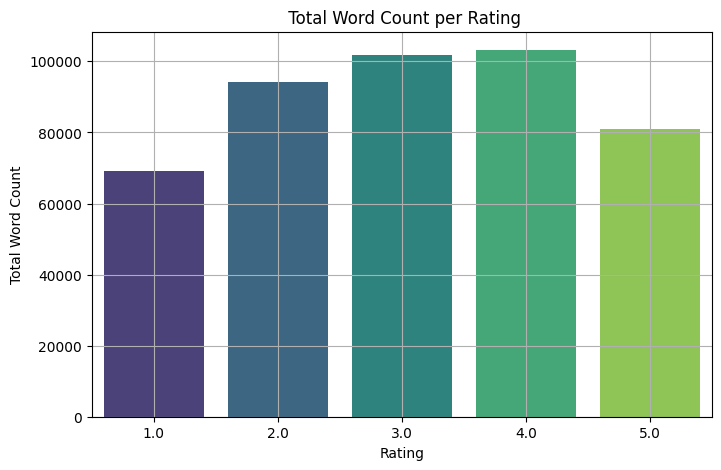

In [15]:
word_count_by_rating = df.groupby('Rating')['Word_Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

In [16]:
df = df.drop(columns=['Word_Count'])

## samples of each rating in balanced dataset

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 1:

1. Ordered this for my son. Im aware it was a lightweight raincoat but it has got to be the thinnest "coat" ever. Its so thin they could've sent it in an envelope. I like the way it looks but I wouldn't expect this to last long at all! I've never seen something so ridiculous. The zipper is the thickest part of the coat and im sure if anything snags it it will be destroyed immediately. Not worth the money, Very disappointed. I would have just spent more on a nicer coat had I known. Hopefully this review helps someone else!

2. I bought this very cute t-shirt in sky. wore it once, then washed it according to the washing instuctions (machine washable/dryable). this t-shirt turned into a crop top!!!!! i can't wear it. it's going to goodwill. i would suggest that you air dry this shirt, if you want to take the chance that it won't shrink up several inches.

3. Everything. I want my money back. Should not be sold on Amazon.  PLEASE HELP

4. Very tigh

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 2:

1. Very nice fabric and quality but runs very large. i had to return my pair of a size 0. stinks to pay for shipping on a product that looks so different in the picture.

2. Okay he comfort, stretch, lightweight are all amazing. I ordered two pairs of “Pure White”.They were not white. In fact they were a light blue/grey. I would give it 5 stars for everything except correctness of order.

3. I loved this shirt so much i bought it in 4 colors. however, two of them shrunk. i was very disappointed.

4. So disappointed in the abundance of polyester fabrics that retailer carries these days. especially at this price point. the pattern and style of this dress is beautiful, but i will never spend two hundred dollars (or even half that) on a poly dress. please add more linen, cotton, and silk!

5. The sweater is very comfy and looked good the first time i tried it on, however the material is thin and slightly see through.
also, after one wear it complet

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 3:

1. These didn't fit as expected too small not like my older izods

2. Like the previous reviewer, the biggest problem with this shirt is how short it is. i'm 5'4 and ordered a 12, which is usually what i wear at retailer. even only being 5'4, this shirt is much shorter than i anticipated. it fits everywhere else, though. i'm obsessed with the back so i'm going to keep it and wear it. i'd say it's worth it at the sale price.

3. I wanted this jacket so bad and waited so long for it to arrive, but it never arrived, I'm so disappointed. I ordered an XL based on the several other blazers by Allegra K I have and I'm sure this one wouldn't disappoint and the colors look fantastic!  Oh well.

4. Even their smallest size will drown you!

5. I have a love hate relationship with this product. it is comfortable and cozy, yet unshapely. after the initial wear, the product begins to stretch out, and if you sit for a while your knees are demarcated in the fa

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 4:

1. I had the priviledge of trying this on during the 20% off tops sale, too bad but the store only had regualr sizes, and xs was the smallest. i am not super tiny (read have muscles), but this looked huge on me. love the colros and textures though, the line in the back is pretty and adds charm when you turn around, and the combo of all the colros is awesome, but i would need a xxs or perhaps a petite (though it is short, so not sure about petite)... soft, but try a smaller size...

2. The shirt has a very nice Hawaian print to it, as a matter of fact it looks very nice once you put it on. The shirt material is lightweight but the material itself to me is not of high quality but rather some shirt of polyester blend. The size rins a little bit bigger than expected. Other than that it is a good summer shirt to bring on on your trips and wear in casual outings.

3. This sweater is amazing. color is vibrant. quality is high. but i have a super long 

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 5:

1. Love polkadots, love sparkle. these little socks are perfect for booties.

2. Fits perfectly for my husband who is 6-6. He says they are comfortable and perfect in length.

3. Por el precio son muy buenos y comodos

4. Hi, i love this top. it not only is femine but it is wee bit sexy. it could be worn in the office then out for happy hour

5. I love this blouse! it's very flattering- gives the illusion of an hourglass shape. the fabric feels soft and flowy, and the pattern is pretty; it does need a camisole underneath because it's kinda sheer. it does run small! i usually wear a size 0 in retailer clothes, but i bought a size 2 in this shirt and the sleeves are still very snug around my forearms which is unusual for me.



## train and test split

In [22]:
# Shuffle the balanced DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df['Review']
y=df['Rating']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

## visualization of y_train and y_test

In [26]:
y_train.value_counts()

Rating
1.0    1600
4.0    1600
3.0    1600
2.0    1600
5.0    1600
Name: count, dtype: int64

In [28]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\2621185537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=train_df, palette='viridis')


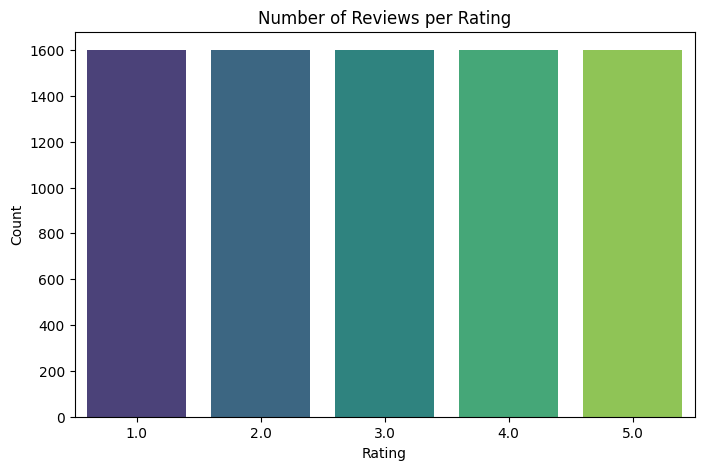

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=train_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [34]:
train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\3536735248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')


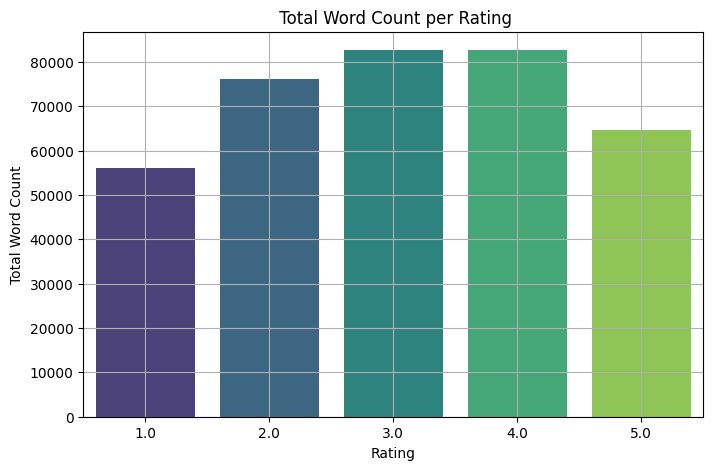

In [35]:
word_count_by_rating = train_df.groupby('Rating')['Word_Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

In [37]:
y_test.value_counts()

Rating
1.0    400
2.0    400
3.0    400
5.0    400
4.0    400
Name: count, dtype: int64

In [38]:
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\574291667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=test_df, palette='viridis')


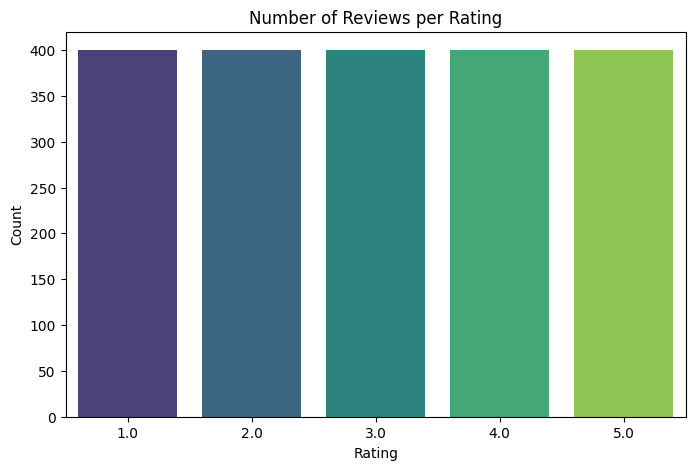

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=test_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [40]:
test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\4258918706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')


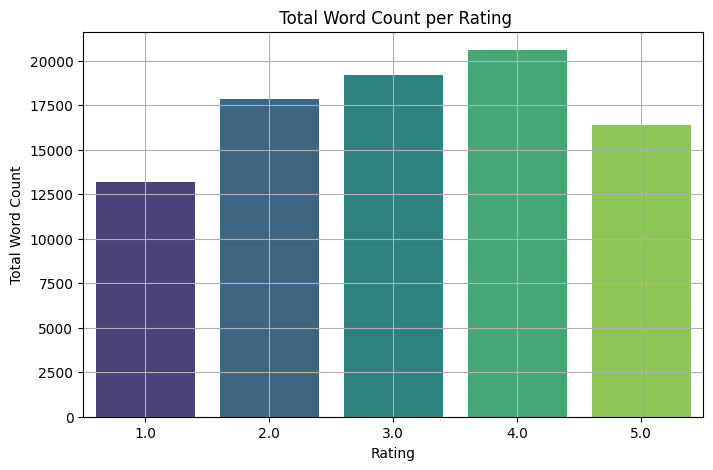

In [41]:
word_count_by_rating = test_df.groupby('Rating')['Word_Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

## samples of each rating in test dataset

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 1:

1. Shrinks in dryer

2. This top is perfect for the first day at clown college if you want to see some clowns cry. the sleeves are probably the worst part of this overpriced monstrosity. the elastic at the cuffs makes the already comically large sleeves billow and puff out even more. 

buy this if you enjoy walking to the post office to return things.

3. Disappointed, I just received these and there is stains on them. I will be trying to get stains out of these pants all season once baseball starts.  I didn't need them to come pre-stained.

4. This dress had so much potential. looked cute when i received it. put it on & couldn't wait to take it off. it's shapeless, top heavy & just overall unflattering. the material could be cute....on a totally different dress. don't waste your money.

5. I am returning these, because they’re super thin and scratchy material. Not good.



In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 2:

1. Pockets are far too shallow.

2. The pattern and fabric are lovely, but the sleeves are short (unlike the photo) so it drapes very strangely. i personally could not figure out how to wear it so that it looked anything remotely like the photo. had to return this one.

3. It's not a bad concept but i wished for more. i wish this tunic was a: different material as it was wrinkley and drop-waist design instead of at the waist. too bad. i wanted to love it but it will go back.

4. I was a little shocked to see a Columbia jacket so flimsy. No lining and it's made out of a lightweight nylon. The child will definitely need a sweater under it. So disappointed.

5. I was excited to see this top, ordered it and was disappointed. it was too tight across the chest and had too much fabric around the bottom. i tried this on 3 times hoping for i had been wrong in previous assessments- no luck.



In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 3:

1. Wish the zipper was more durable. It broke after only a handful of washes.

2. I wanted to love this, as it seemed like a fun and carefree take on a little black dress.

but how did i not see that this has tassels? but they're there, a whole row of them - look hear the bottom of the skirt part, between the colorful stripes and the lacy area. that's a deal breaker for me - i really can't stand the way these look, and they're not the sort of thing you can easily remove.

the fabric, though nice quality, has no stretch at all. i wasn't expecting stretch, but i'd just say

3. I loved the fit, color and style, but the fabric seemed very thin and cheap. i was worried that it would tear easily. this is getting returned.

4. I bought this (because it looks beautiful, is well made, and a high quality piece). when i got it home and tried it on, it did not achieve the look i was going for (boho). instead, it was very drapery and full and big and i felt

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 4:

1. The dress is  very feminine and very flirty. i love orange/melon-colored dresses. this one does not disappoint. it does run extremely small around the rib cage. i had to size up to a 6 when i typically wear a 2 or 4. my bra size is 32 b. nice quality fabric, lined, with built-in bustier.

2. I wanted to roder hte petite version, as it runs long, but they are out of the ivory. i put hte green-ish color in my basket, and may order it, but for now, i am hlding off as i have other nice seaters... so many choices.

long, warm, fun closure, falttering, and nice tie back detail.

3. These jeans are great. the rise is perfect.

4. This is silly, but the moss is not brown as pictured but olive green. with that "said," i am going more casual, and i love the "flex" of this coat. the shape is beautiful and the lining is fun. i waited two months to get this in close to my size 00. for my style it is a keeper, but this back order situation is not acceptab

In [ ]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 5:

1. Cute and comfy. seems to fit true to size. flattering and roomy on top for my 34ddd shape, but doesn't make me look pregnant or fat overall, which sometimes happens without a waist to define shape. super cute!

2. The size fits perfectly and it’s a nice blend of two shade color in the t shirt. It is a perfect outfit to wear for casual occasions and also the material is very soft and comfortable.

3. I love this top.  the fit is great for me. i ordered a small. the color is a bit more peach than the pink in the picture,  but still very cute.

4. Runs large. Nice fabric and love the color.

5. I saw this dress in a store the other day. it is so cute in real life. i don't think the pictures online even begin to show how cute it is on. the dress is well-made and it fit perfectly. in fact, it is quite flattering. i am so happy i saw it in the store. even though i am big online shopper i would have passed on this dress if i only saw it online, but

## preprocessing

In [47]:
#removing punctuations and making lower case
X_train = X_train.str.lower()
X_train = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [48]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [49]:
X_train=X_train.apply(clean_text)

## stopword removal and lematization

In [50]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [51]:
# Print all stop words
print(" Total stop words:", len(nlp.Defaults.stop_words))
print(" Stop words list:")
print(sorted(nlp.Defaults.stop_words))

 Total stop words: 326
 Stop words list:
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 

In [52]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [54]:
X_train=X_train.apply(cleaning)

In [56]:
#removing punctuations and making lower case
X_test = X_train.str.lower()
X_test = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [57]:
X_test=X_test.apply(clean_text)

In [58]:
X_test=X_test.apply(cleaning)

In [59]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

train_df = train_df[(train_df['Word_Count'] >= 3) & (train_df['Word_Count'] <= 100)]


X_train = train_df['Review']
y_train = train_df['Rating']

In [60]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

test_df = test_df[(test_df['Word_Count'] >= 3) & (test_df['Word_Count'] <= 100)]


X_test = test_df['Review']
y_test = test_df['Rating']

## TF-IDF

In [66]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [69]:
# create a tfidf vectorizer matrix
tv = TfidfVectorizer()
Xtrain = tv.fit_transform(X_train)

In [70]:
X = pd.DataFrame(Xtrain.toarray(), columns=tv.get_feature_names_out())
X

,00,000,00p,04,06,0p,0r,10,100,100lbs,...,zipper,zippered,zippers,zipping,zips,zity,zone,zoolander,zooming,áspera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217494,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136514,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [71]:

Xtest = tv.fit_transform(X_test)

In [72]:
Y = pd.DataFrame(Xtest.toarray(), columns=tv.get_feature_names_out())
Y

,00,00p,0p,10,100,102,103lbs,105,105lb,108,...,yummy,zero,zip,zipped,zipper,zippers,zipping,zips,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
